In [11]:
%pip install -r requirements.txt

INFO: pip is looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_core-0.1.32-py3-none-any.whl.metadata (6.0 kB)
  Using cached langchain_core-0.1.31-py3-none-any.whl.metadata (6.0 kB)
  Using cached langchain_core-0.1.30-py3-none-any.whl.metadata (6.0 kB)
  Using cached langchain_core-0.1.29-py3-none-any.whl.metadata (6.0 kB)
  Using cached langchain_core-0.1.28-py3-none-any.whl.metadata (6.0 kB)
  Using cached langchain_core-0.1.27-py3-none-any.whl.metadata (6.0 kB)
  Using cached langchain_core-0.1.26-py3-none-any.whl.metadata (6.0 kB)
INFO: pip is still looking at multiple versions of langchain-core to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_core-0.1.25-py3-none-any.whl.metadata (6.0 kB)
  Using cached langchain_core-0.1.24-py3-none-any.whl.metadata (6.0 kB)
  Using cached langchain_core-0.1.23-py3-non

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-text-splitters 0.0.1 requires langchain-core<0.2.0,>=0.1.28, but you have langchain-core 0.1.23 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip show ragas

Name: ragas
Version: 0.1.5
Summary: 
Home-page: 
Author: 
Author-email: 
License: 
Location: c:\users\anirudh\appdata\local\programs\python\python310\lib\site-packages
Requires: appdirs, datasets, langchain, langchain-community, langchain-core, langchain-openai, nest-asyncio, numpy, openai, pysbd, tiktoken
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install langchain_text_splitter qdrant_client

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement langchain_text_splitter (from versions: none)
ERROR: No matching distribution found for langchain_text_splitter

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from doc_loader import DocumentChunker
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI, GoogleGenerativeAIEmbeddings
import google.generativeai as genai 
import os
from langchain_experimental.agents import create_csv_agent
from langchain_community.vectorstores import Qdrant
from langchain_community.embeddings import HuggingFaceBgeEmbeddings
from qdrant_client import QdrantClient
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
# Initializing clients

In [10]:
!pip install ragas


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
%pip install datasets 

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context

In [2]:
def add_vector(value,q_db):
    client = QdrantClient(
            url = q_db["url"],
            prefer_grpc= False
        )

    vectore_store = Qdrant(
            client = client,
            embeddings = q_db["embeddings"],
            collection_name = q_db["collection_name"]
        )
    
    vectore_store.add_documents(value)
       

def create_index(value,q_db):
    qdrant = Qdrant.from_documents(
            value,
            q_db["embeddings"],
            url = q_db["url"],
            prefer_grpc = False,
            collection_name = q_db["collection_name"]
        )

    print("Qdrant Index created.....")

def get_qdrant_retriever(q_db):
    print("Creating retriever for department: ", q_db["course_id"])
    

    client = QdrantClient(
            url = q_db["url"],
            prefer_grpc= False
        )

    vector_store = Qdrant(
            client = client,
            embeddings = q_db["embeddings"],
            collection_name = q_db["collection_name"]
        )
    
    retriever = vector_store.as_retriever(search_kwargs={'filter': {'course_id': q_db["course_id"]}})
    print(retriever)
    return retriever

def run_agent(q_db):

    model= ChatGoogleGenerativeAI(model="gemini-pro",temperature=0.3,convert_system_message_to_human=True)
    prompt_template="""
    Answer the question as detailed as possible from the provided context, make sure to provide all details, if the answer is not in provided context just say, "Answer is not available in the context". don't provide the wrong answer
    Context:\n {context}?\n
    Question: \n{question}\n

    Answer:
    """
    prompt = PromptTemplate(template=prompt_template,input_variables=["context","question"])



    qa = RetrievalQA.from_chain_type(
    llm=model,
    chain_type="stuff",
    retriever= get_qdrant_retriever(q_db),
    chain_type_kwargs={"prompt": prompt},
    )

    return qa


In [44]:
def evaluate_agent(context,question):
    model= ChatGoogleGenerativeAI(model="gemini-pro",temperature=0.3,convert_system_message_to_human=True)
    prompt_template="""
    Answer the question as detailed as possible from the provided context, make sure to provide all details, if the answer is not in provided context just say, "Answer is not available in the context". don't provide the wrong answer
    Context:\n {context}?\n
    Question: \n{question}\n

    Answer:
    """
    prompt = PromptTemplate(template=prompt_template,input_variables=["context","question"])
    return prompt

In [34]:
amnesty_qa = load_dataset("explodinggradients/amnesty_qa", "english_v2")
amnesty_qa

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Dataset amnesty_qa downloaded and prepared to C:/Users/Anirudh/.cache/huggingface/datasets/explodinggradients___amnesty_qa/english_v2/2.0.0/d0ed9800191a31943ee52a5c22ee4305e28a33f5edcd9a323802112cff07cc24. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    eval: Dataset({
        features: ['question', 'ground_truth', 'answer', 'contexts'],
        num_rows: 20
    })
})

In [40]:
df_amnesty_qa = pd.DataFrame(amnesty_qa["eval"])
df_amnesty_qa = df_amnesty_qa.drop('answer',axis=1)

In [60]:
df_amnesty_qa["question"].iloc[0]

'What are the global implications of the USA Supreme Court ruling on abortion?'

In [48]:
evaluate_agent(df_amnesty_qa["contexts"][0],df_amnesty_qa["question"][0])

PromptTemplate(input_variables=['context', 'question'], template='\n    Answer the question as detailed as possible from the provided context, make sure to provide all details, if the answer is not in provided context just say, "Answer is not available in the context". don\'t provide the wrong answer\n    Context:\n {context}?\n\n    Question: \n{question}\n\n\n    Answer:\n    ')

In [61]:

# data
from datasets import load_dataset
import pandas as pd

fiqa_eval = load_dataset("explodinggradients/fiqa", "ragas_eval")
print(fiqa_eval["baseline"])
df_fiqa_eval = pd.DataFrame(fiqa_eval["baseline"])

Using the latest cached version of the module from C:\Users\Anirudh\.cache\huggingface\modules\datasets_modules\datasets\explodinggradients--fiqa\3dc7b639f5b4b16509a3299a2ceb78bf5fe98ee6b5fee25e7d5e4d290c88efb8 (last modified on Thu Mar 21 22:37:25 2024) since it couldn't be found locally at explodinggradients/fiqa., or remotely on the Hugging Face Hub.
Found cached dataset fiqa (C:/Users/Anirudh/.cache/huggingface/datasets/explodinggradients___fiqa/ragas_eval/1.0.0/3dc7b639f5b4b16509a3299a2ceb78bf5fe98ee6b5fee25e7d5e4d290c88efb8)


  0%|          | 0/1 [00:00<?, ?it/s]

Dataset({
    features: ['question', 'ground_truths', 'answer', 'contexts'],
    num_rows: 30
})


In [62]:
print(fiqa_eval["baseline"])

Dataset({
    features: ['question', 'ground_truths', 'answer', 'contexts'],
    num_rows: 30
})


In [63]:
df_fiqa_eval = df_fiqa_eval.drop('answer',axis=1)

In [64]:
len(df_fiqa_eval)

30

In [68]:
df_fiqa_eval.rename(columns = {'ground_truths':'ground_truth'}, inplace = True)
test_questions = []
contexts = []
test_ground_truth = []
for i in range(0,len(df_fiqa_eval)):
    test_questions.append(df_fiqa_eval["question"].iloc[i])
    contexts.append(df_fiqa_eval["contexts"].iloc[i])
    test_ground_truth.append(df_fiqa_eval["ground_truth"].iloc[i])

In [69]:
test_ground_truth

[["Have the check reissued to the proper payee.Just have the associate sign the back and then deposit it.  It's called a third party cheque and is perfectly legal.  I wouldn't be surprised if it has a longer hold period and, as always, you don't get the money if the cheque doesn't clear. Now, you may have problems if it's a large amount or you're not very well known at the bank.  In that case you can have the associate go to the bank and endorse it in front of the teller with some ID.  You don't even technically have to be there.  Anybody can deposit money to your account if they have the account number. He could also just deposit it in his account and write a cheque to the business."],
 ["Sure you can.  You can fill in whatever you want in the From section of a money order, so your business name and address would be fine. The price only includes the money order itself.  You can hand deliver it yourself if you want, but if you want to mail it, you'll have to provide an envelope and a s

In [71]:
from datasets import Dataset

response_dataset = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_ground_truth
})

ArrowInvalid: Column 1 named answer expected length 30 but got length 0

# Metrics

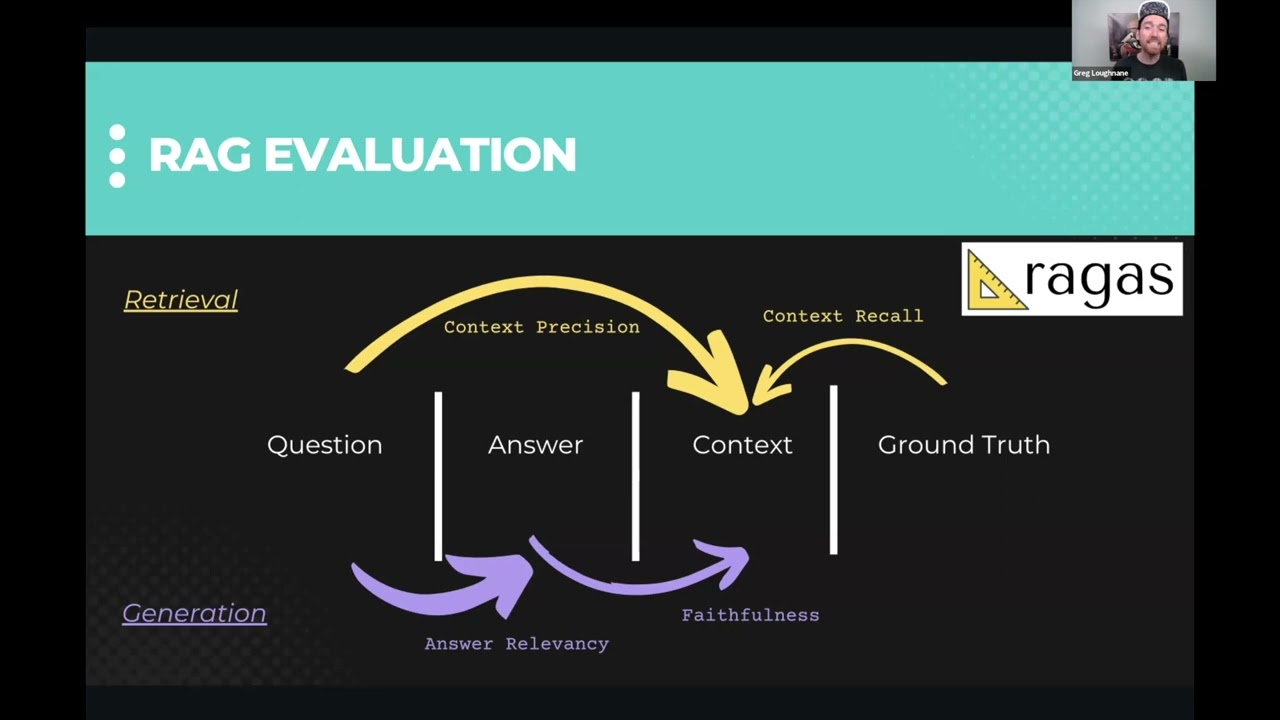

In [13]:
from dotenv import load_dotenv

In [27]:
load_dotenv()
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))
google_embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
google_llm = ChatGoogleGenerativeAI(model="gemini-pro",temperature=0.3,convert_system_message_to_human=True, request_timeout=120)

In [28]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision
)

In [29]:
from ragas import evaluate

result = evaluate(
    fiqa_eval["baseline"].select(range(10)),
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall
    ],  llm=google_llm, embeddings=google_embeddings
)



passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
C:\Users\Anirudh\AppData\Local\Programs\Python\Python310\lib\site-packages\datasets\table.py:1393: FutureWarning: promote has been superseded by mode='default'.
  return cls._concat_blocks(pa_tables_to_concat_vertically, axis=0)


Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<loc

In [30]:
result

{'context_precision': 0.1000, 'faithfulness': 0.9500, 'answer_relevancy': 0.7393, 'context_recall': 0.5432}

First 10: {'context_precision': 0.1000, 'faithfulness': 0.9500, 'answer_relevancy': 0.7393, 'context_recall': 0.5432}

answer_relevancy - a measure of how relevant the answer is to the question

faithfulness - the factual consistency of the answer to the context base on the question.

context_recall: measures the ability of the retriever to retrieve all the necessary information needed to answer the question.

context_precision - a measure of how relevant the retrieved context is to the question. Conveys quality of the retrieval pipeline.

# Evaluate each row and save

In [51]:
course_name = "XYZ channel"
q_db = {
        "url": "http://localhost:6333",
        "collection_name": "ssngpt_collection" ,
        "embeddings": GoogleGenerativeAIEmbeddings(model="models/embedding-001"),
        "course_id": course_name
    }


In [52]:
# Defining retriver 

client = QdrantClient(
            url = q_db["url"],
            prefer_grpc= False
        )

vector_store = Qdrant(
            client = client,
            embeddings = q_db["embeddings"],
            collection_name = q_db["collection_name"]
        )
    

retriever = vector_store.as_retriever()

In [72]:
from operator import itemgetter

from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

model= ChatGoogleGenerativeAI(model="gemini-pro",temperature=0.3,convert_system_message_to_human=True)
prompt_template="""
    Answer the question as detailed as possible from the provided context, make sure to provide all details, if the answer is not in provided context just say, "Answer is not available in the context". don't provide the wrong answer
    Context:\n {context}?\n
    Question: \n{question}\n

    Answer:
    """
prompt = PromptTemplate(template=prompt_template,input_variables=["context","question"])


retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | retriever, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": prompt | model, "context": itemgetter("context")}
)

In [73]:
answers = []
contexts = []

for question in test_questions:
  response = retrieval_augmented_qa_chain.invoke({"question" : question})
  answers.append(response["response"].content)
  contexts.append([context.page_content for context in response["context"]])

In [74]:
answers

['Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is not available in the context',
 'Answer is

In [ ]:
from datasets import Dataset

response_dataset = Dataset.from_dict({
    "question" : test_questions,
    "answer" : answers,
    "contexts" : contexts,
    "ground_truth" : test_groundtruths
})

In [33]:
from ragas import evaluate

print(fiqa_eval["baseline"][0])
result = evaluate(
    fiqa_eval["baseline"].select(0),
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall
    ],  llm=google_llm, embeddings=google_embeddings
)


{'question': 'How to deposit a cheque issued to an associate in my business into my business account?', 'ground_truths': ["Have the check reissued to the proper payee.Just have the associate sign the back and then deposit it.  It's called a third party cheque and is perfectly legal.  I wouldn't be surprised if it has a longer hold period and, as always, you don't get the money if the cheque doesn't clear. Now, you may have problems if it's a large amount or you're not very well known at the bank.  In that case you can have the associate go to the bank and endorse it in front of the teller with some ID.  You don't even technically have to be there.  Anybody can deposit money to your account if they have the account number. He could also just deposit it in his account and write a cheque to the business."], 'answer': '\nThe best way to deposit a cheque issued to an associate in your business into your business account is to open a business account with the bank. You will need a state-issu

TypeError: 'int' object is not iterable